<a href="https://colab.research.google.com/github/SoraBioDataSci/KutaPortfolio/blob/main/Project_Yearly_Expense_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Data Collection:Load the dataset into the dataframe

In [8]:
!head /content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `head /content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv'


In [9]:
data = pd.read_csv('/content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv')

In [ ]:
data.head()

,Transaction ID,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Notes and #tags,Address,Receipt,Description,Category split,Money Out,Money In
0,tx_0000ATvOMUtvIPM5DXHlXV,24/03/2023,01:05:14,Bacs (Direct Credit),Cwealth Scholar Co,NaN,Income,3708.00,GBP,3708.00,GBP,PPY038203/1798,NaN,NaN,PPY038203/1798,NaN,NaN,3708.0
1,tx_0000ATyN0M4BwbBNjKOGm1,25/03/2023,11:34:09,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,NaN,NaN,SumUp *Munch Solihull GBR,NaN,-3.50,NaN
2,tx_0000ATyb8ujkK8QVm74oXh,25/03/2023,14:12:34,Card payment,Sainsbury’s,🍏,Groceries,-430.85,GBP,-430.85,GBP,NaN,1 CHAPEL LANE,NaN,SAINSBURY'S SELLY OAK BIRMINGHAM GBR,NaN,-430.85,NaN
3,tx_0000AU0SwoeSiCluzWepAf,26/03/2023,11:50:10,Card payment,ATM,💵,Finances,-250.00,GBP,-250.00,GBP,NaN,Tesco Bm Br R Exp,NaN,TESCO BM BR R EXP BIRMINGHAM GBR,NaN,-250.00,NaN
4,tx_0000AU0ddg9z9rSQ626Vv9,26/03/2023,13:49:58,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,NaN,NaN,SumUp *Munch Solihull GBR,NaN,-3.50,NaN


In [10]:
data.drop(['Transaction ID','Notes and #tags','Category split','Receipt'], axis=1, inplace=True)

Data Preprocessing:Remove some unnecessary columns like 'transaction ID','Notes and #tags','Category Split' and 'Receipt.'

In [11]:
data.head()

,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Address,Description,Money Out,Money In
0,24/03/2023,01:05:14,Bacs (Direct Credit),Cwealth Scholar Co,NaN,Income,3708.00,GBP,3708.00,GBP,NaN,PPY038203/1798,NaN,3708.0
1,25/03/2023,11:34:09,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,SumUp *Munch Solihull GBR,-3.50,NaN
2,25/03/2023,14:12:34,Card payment,Sainsbury’s,🍏,Groceries,-430.85,GBP,-430.85,GBP,1 CHAPEL LANE,SAINSBURY'S SELLY OAK BIRMINGHAM GBR,-430.85,NaN
3,26/03/2023,11:50:10,Card payment,ATM,💵,Finances,-250.00,GBP,-250.00,GBP,Tesco Bm Br R Exp,TESCO BM BR R EXP BIRMINGHAM GBR,-250.00,NaN
4,26/03/2023,13:49:58,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,SumUp *Munch Solihull GBR,-3.50,NaN


In [12]:
data['Description']=data['Description'].str.lower()

Convert strings in 'Description' to lower case

In [13]:
data.head()

,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Address,Description,Money Out,Money In
0,24/03/2023,01:05:14,Bacs (Direct Credit),Cwealth Scholar Co,NaN,Income,3708.00,GBP,3708.00,GBP,NaN,ppy038203/1798,NaN,3708.0
1,25/03/2023,11:34:09,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,sumup *munch solihull gbr,-3.50,NaN
2,25/03/2023,14:12:34,Card payment,Sainsbury’s,🍏,Groceries,-430.85,GBP,-430.85,GBP,1 CHAPEL LANE,sainsbury's selly oak birmingham gbr,-430.85,NaN
3,26/03/2023,11:50:10,Card payment,ATM,💵,Finances,-250.00,GBP,-250.00,GBP,Tesco Bm Br R Exp,tesco bm br r exp birmingham gbr,-250.00,NaN
4,26/03/2023,13:49:58,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,sumup *munch solihull gbr,-3.50,NaN


In [14]:
data=data.sort_values(by='Date',ascending=False)

Reorder rows in ascending dates

In [15]:
data.head()

,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Address,Description,Money Out,Money In
157,31/07/2023,11:16:30,Card payment,NX Bus,🚍,Transport,-2.00,GBP,-2.00,GBP,51 Bordesley Green,nx bus contactless birmingham gbr,-2.00,NaN
158,31/07/2023,13:10:08,Card payment,Uber,🚖,Transport,-5.91,GBP,-5.91,GBP,Aldgate Tower First Floor,uber * pending london gbr,-5.91,NaN
217,30/09/2023,16:11:34,Card payment,Trent Barton,🚌,Transport,-7.60,GBP,-7.60,GBP,United Kingdom,contactless.travel heanor gbr,-7.60,NaN
99,30/05/2023,11:28:58,Card payment,Asda,🍏,Groceries,-10.95,GBP,-10.95,GBP,Morris Square,asda store 4758 wolstanton gbr,-10.95,NaN
61,30/04/2023,13:45:31,Card payment,Uber,🚖,Transport,-5.95,GBP,-5.95,GBP,2 Leman Street,uber * pending london gbr,-5.95,NaN


In [16]:
data.shape

(245, 14)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 157 to 122
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            245 non-null    object 
 1   Time            245 non-null    object 
 2   Type            245 non-null    object 
 3   Name            244 non-null    object 
 4   Emoji           219 non-null    object 
 5   Category        245 non-null    object 
 6   Amount          245 non-null    float64
 7   Currency        245 non-null    object 
 8   Local amount    245 non-null    float64
 9   Local currency  245 non-null    object 
 10  Address         164 non-null    object 
 11  Description     245 non-null    object 
 12  Money Out       222 non-null    float64
 13  Money In        23 non-null     float64
dtypes: float64(4), object(10)
memory usage: 28.7+ KB


In [18]:
data.describe()

,Amount,Local amount,Money Out,Money In
count,245.000000,245.000000,222.000000,23.000000
mean,3.863837,2.645878,-41.013243,437.025217
std,313.657225,316.365115,115.204436,861.004790
min,-923.000000,-929.750000,-923.000000,2.220000
25%,-17.050000,-17.050000,-19.470000,5.955000
50%,-6.990000,-6.990000,-7.890000,8.980000
75%,-3.500000,-3.500000,-4.972500,409.000000
max,3708.000000,3708.000000,0.000000,3708.000000


In [19]:
data['Category'].describe()

count           245
unique           13
top       Transport
freq             96
Name: Category, dtype: object

Plot a bar and pie chart showing all the categories of expenses and their distributions.

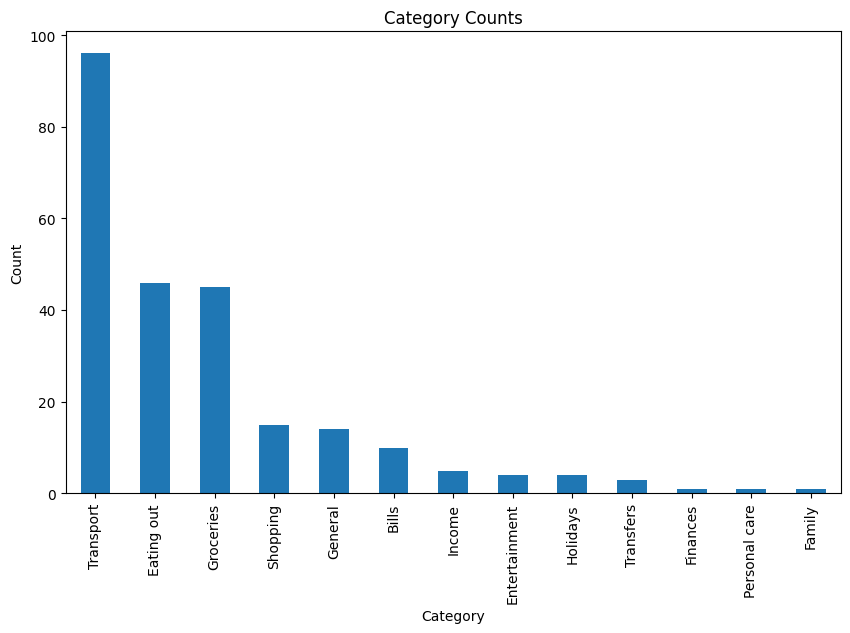

In [20]:
category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Category'>

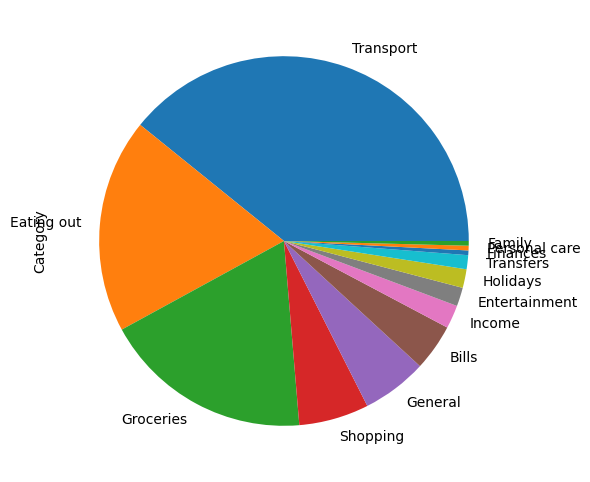

In [21]:
data['Category'].value_counts().plot(kind='pie', figsize=(6,6))


In [22]:
corr = data.corr()
corr

<ipython-input-22-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Amount,Local amount,Money Out,Money In
Amount,1.000000,0.999031,1.000000,1.0
Local amount,0.999031,1.000000,0.994147,1.0
Money Out,1.000000,0.994147,1.000000,NaN
Money In,1.000000,1.000000,NaN,1.0


How are they correlated?

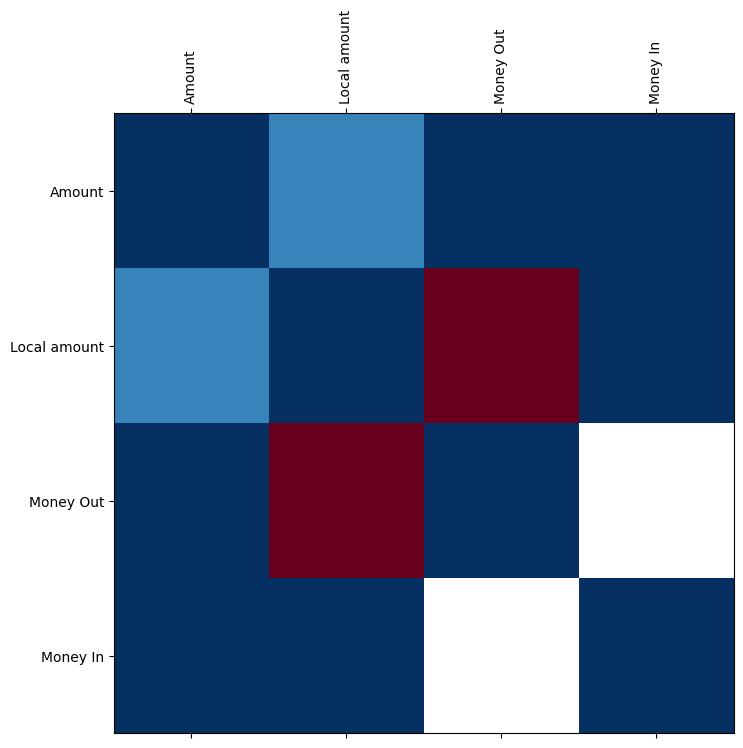

In [23]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);


Generate time series plots to identify spending trends over time


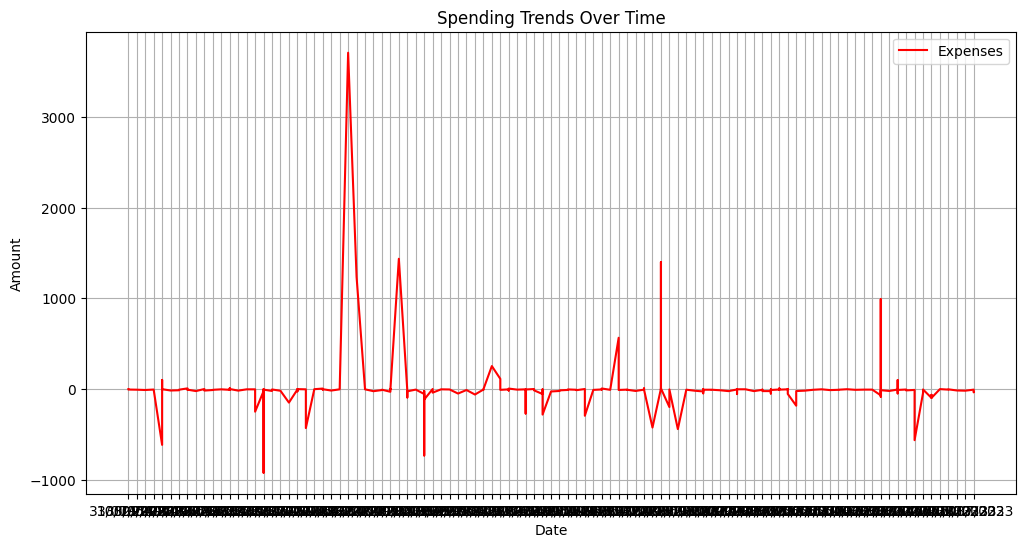

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Amount'], label='Expenses', color='red')
plt.title('Spending Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


Customize the time series plot further by adding labels, titles,legends and adjusting the appearance

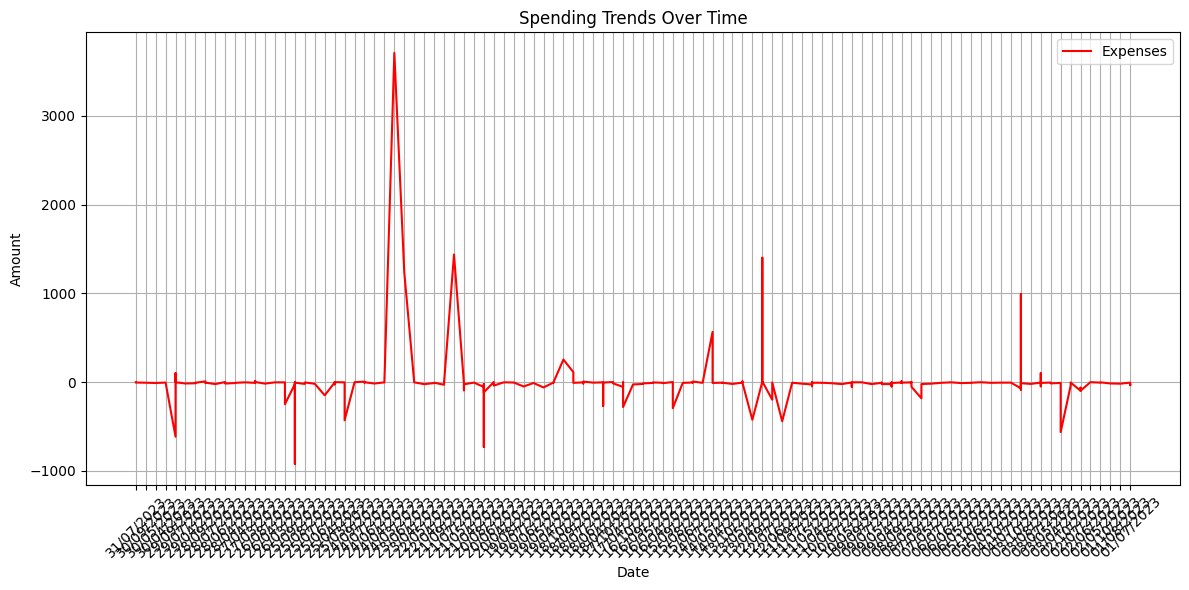

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Amount'], label='Expenses', color='red')
plt.title('Spending Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()


In [29]:
print(data.columns)

Index(['Date', 'Time', 'Type', 'Name', 'Emoji', 'Category', 'Amount',
       'Currency', 'Local amount', 'Local currency', 'Address', 'Description',
       'Money Out', 'Money In'],
      dtype='object')


In [31]:
import seaborn as sns


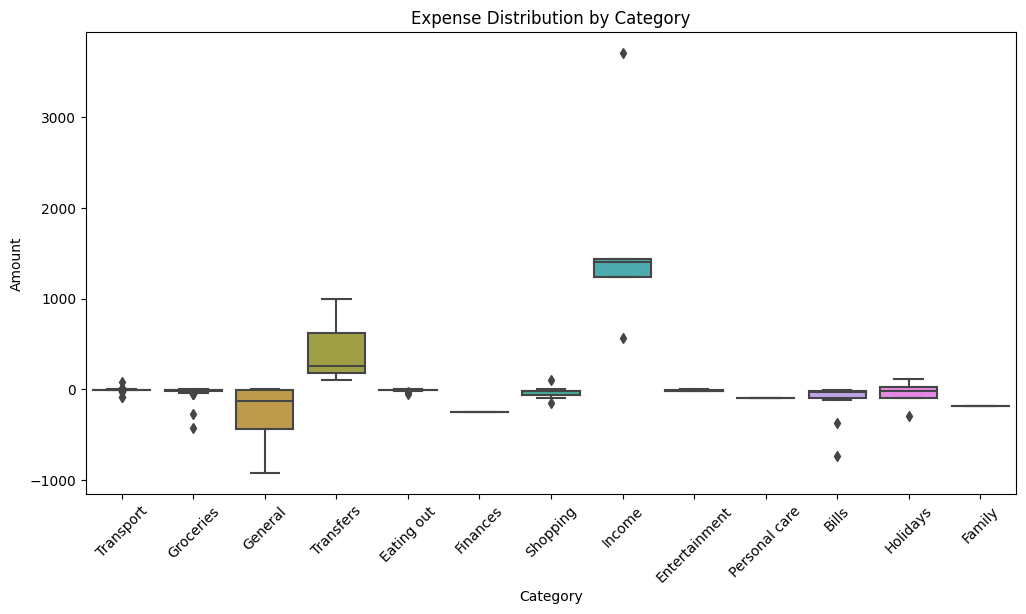

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Category', y='Amount')
plt.title('Expense Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


Calculate the summary statistics for each category in the data

In [34]:
grouped = data.groupby('Category')


In [37]:
category_statistics = grouped['Amount'].agg(['mean', 'median', 'std'])
print(category_statistics)

                      mean    median          std
Category                                         
Bills          -141.153000   -34.945   235.868334
Eating out       -9.514130    -5.945     9.369312
Entertainment   -14.607500   -15.740    10.512162
Family         -184.000000  -184.000          NaN
Finances       -250.000000  -250.000          NaN
General        -257.687143  -134.500   293.876466
Groceries       -29.194667   -10.150    73.513375
Holidays        -54.550000   -17.750   171.997607
Income         1669.000000  1400.000  1192.735931
Personal care   -93.100000   -93.100          NaN
Shopping        -38.127333   -23.600    55.610628
Transfers       447.666667   253.000   475.863776
Transport        -6.199583    -5.990    15.888535


Data Visualization:Line charts to track your account balance over time. Also Ensure the 'date'column is in a datetime format. Since my data does not contain a category for 'account balance', i will iterate through the transactions and accumulate the amounts.

In [40]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

This code below iterates through the transactions and calculates the account balance at each step, storing the results in a new 'Account_Balance' column in my DataFrame.



In [41]:
account_balance = []
balance = 0

for amount in data['Amount']:
    balance += amount
    account_balance.append(balance)

data['Account_Balance'] = account_balance


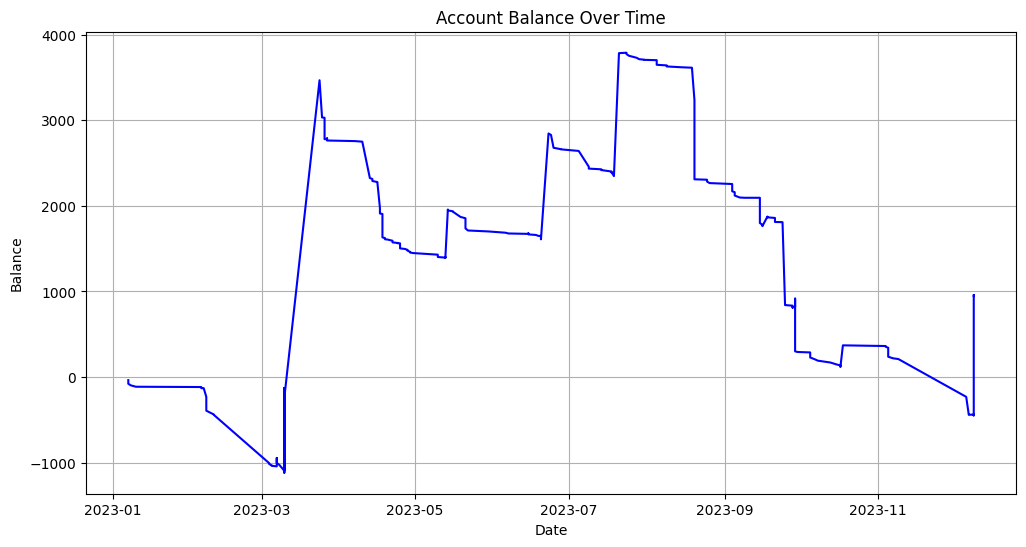

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Account_Balance'], label='Account Balance', color='blue')
plt.title('Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.grid(True)
plt.show()


Customize the line chart by adding labels, titles, legends, and adjusting the appearance, as needed, to improve the visualization's clarity.


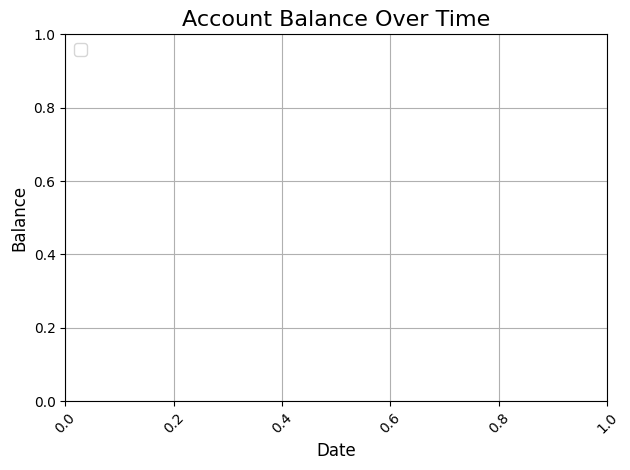

In [43]:
plt.title('Account Balance Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.grid(True)

# Customize the Axis Labels and Legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', fontsize=12)  # Position and font size of the legend

# Adding Annotations
plt.annotate('Start', (data['Date'].iloc[0], data['Account_Balance'].iloc[0]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('End', (data['Date'].iloc[-1], data['Account_Balance'].iloc[-1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

Sample line plot with labels

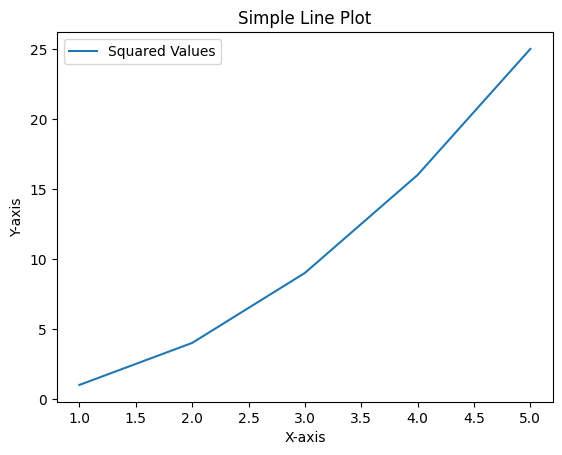

In [44]:
import matplotlib.pyplot as plt

# Create a simple line plot with labels
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y, label='Squared Values')  # Add a label to the line

plt.title('Simple Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()  # Create a legend based on labeled elements

plt.show()


Plot heatmaps to identify spending patterns by category or time. Start by pivoting the data to create a dataframe suitable for a heatmap i.e 'category' as rows,'date' as columns and 'Amount' as values

In [46]:
heatmap_data = data.pivot_table(index='Category', columns='Date', values='Amount', aggfunc='sum', fill_value=0)


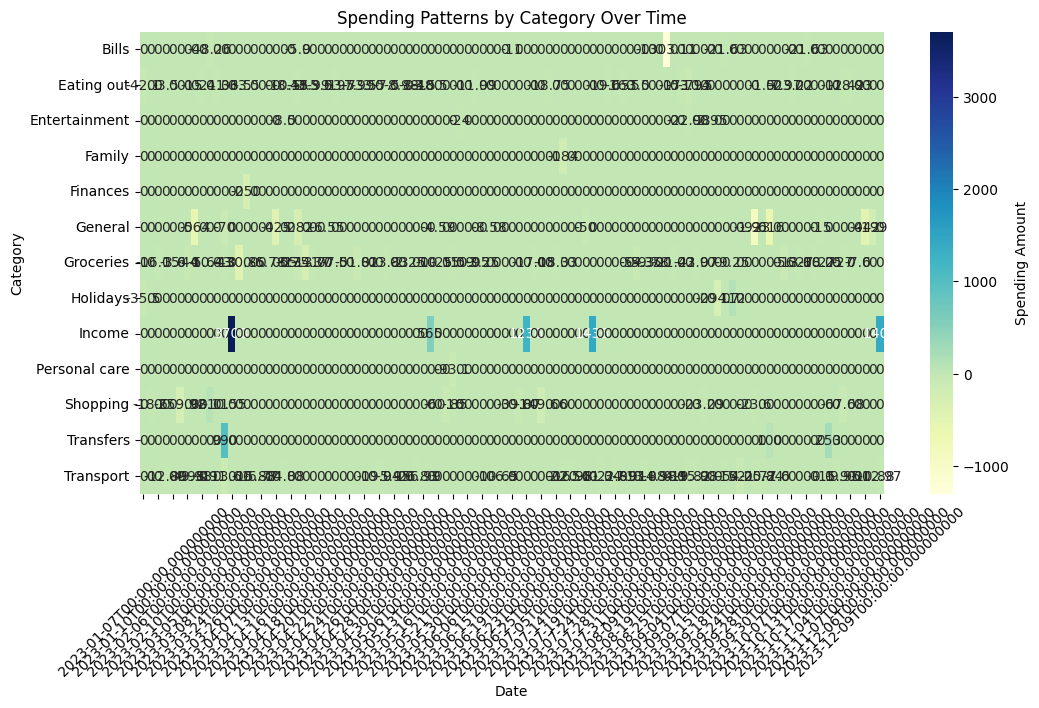

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Spending Amount'})
plt.title('Spending Patterns by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()


Perform time series analysis on my data with timestamps to identify trends, seasonality, and anomalies in my financial data

In [50]:
import statsmodels.api as sm

set the 'Time' column as the DataFrame's index:

In [51]:
data = pd.read_csv('/content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv')
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)


Resample the data to a specific frequency, such as daily, monthly, or any other period that makes sense for my analysis.I use monthly frequency below.

In [52]:
monthly_data = data['Amount'].resample('M').sum()


Create line plots to visualize my financial data over time. This helps in understanding the overall trend and seasonality

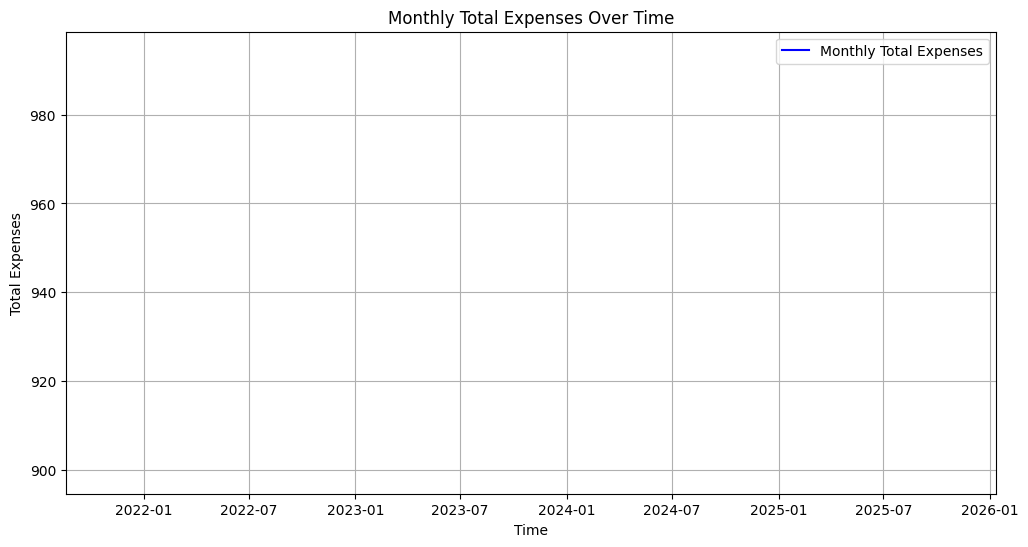

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data, label='Monthly Total Expenses', color='blue')
plt.title('Monthly Total Expenses Over Time')
plt.xlabel('Time')
plt.ylabel('Total Expenses')
plt.grid(True)
plt.legend()
plt.show()


Use the seasonal decomposition of time series (STL) or similar methods to decompose the time series into its trend, seasonality, and residual components. This helps in understanding the underlying patterns


In [59]:
print(data.columns)


Index(['Transaction ID', 'Date', 'Type', 'Name', 'Emoji', 'Category', 'Amount',
       'Currency', 'Local amount', 'Local currency', 'Notes and #tags',
       'Address', 'Receipt', 'Description', 'Category split', 'Money Out',
       'Money In'],
      dtype='object')


What did you learn from the data analysis?


1.   Transport is my highest expense which i least expected. Grocery and Eating out came second and third.
2.   08/23 and 04/23 are the months that i spent the most.
3.  05/23 was the month with the least expense.




